# PNEUMONIA INTERPRETATION PROJECT

## Overview
Given imges of chest x-rays we will use Machine Learning techniques to determine if the patient has pneumonia

# Business Understanding

# Data Understanding

The images were provided in two sets, those that have pneumonia and those that do not. To create traning, test, and validation sets we randomly assigned images to each group. 80 wer pt in trainig group, 20% in testing group.  The validation group was composed fo 20% of the images taken from the complete set of images 

In [94]:
#import PIL
#import PIL.Image
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np  
import os
import pathlib
import matplotlib.pyplot as plt


In [95]:
# Check GPU
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


2.17.0
Num GPUs Available:  1


In [108]:
# Resize the images in the given directory to a specified size.

val_dir = pathlib.Path("zippedData/pneumonia/val")
train_dir = pathlib.Path("zippedData/pneumonia/train")
test_dir = pathlib.Path("zippedData/pneumonia/test")

image_count = len(list(train_dir.glob('*/*.jpeg')))
print(image_count)

batch_size = 16
img_height = 112
img_width = 112

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size)


val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size)

4688
Found 4688 files belonging to 2 classes.
Found 1172 files belonging to 2 classes.
Found 1168 files belonging to 2 classes.


In [109]:
# Check image sizes
for image_batch, labels_batch in train_dataset:
    print(image_batch.shape)
    print(labels_batch.shape)
    break



(16, 112, 112, 3)
(16,)


In [110]:
 # Check image sizes
for image_batch, labels_batch in val_dataset:
    print(image_batch.shape)
    print(labels_batch.shape)
    break



(16, 112, 112, 3)
(16,)


In [99]:
#train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

In [100]:
# normalize the values to be between 0 and 1
normalization_layer = tf.keras.layers.Rescaling(1./255)

normalized_ds = train_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))


In [101]:
# Train the model

num_classes = 2

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

In [102]:
learning_rate = .001
adam_optimizer_scheduled = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=adam_optimizer_scheduled,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [103]:
hist = model.fit(
    normalized_ds,
    validation_data=val_dataset,
    epochs=16,
    verbose=1
)

Epoch 1/16
147/147 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.7288 - loss: 0.6117 - val_accuracy: 0.7295 - val_loss: 3.3894
Epoch 2/16
147/147 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.7354 - loss: 0.5567 - val_accuracy: 0.8584 - val_loss: 53.8894
Epoch 3/16
147/147 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.9041 - loss: 0.2282 - val_accuracy: 0.9130 - val_loss: 34.4900
Epoch 4/16
147/147 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - accuracy: 0.9227 - loss: 0.2012 - val_accuracy: 0.9181 - val_loss: 33.9095
Epoch 5/16
147/147 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.9254 - loss: 0.2009 - val_accuracy: 0.9130 - val_loss: 37.5361
Epoch 6/16
147/147 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.9278 - loss: 0.1916 - val_accuracy: 0.9172 - val_loss: 37.3925
Epoch 7/16
147/147 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.9450 - loss: 0.1554 - val_accuracy: 0.8618 - val_loss: 91.4448
Epoch 8/16
147/147 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.9462 - loss: 0.1

In [104]:
hist_dict = hist.history
print(hist_dict.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


<Figure size 640x480 with 0 Axes>

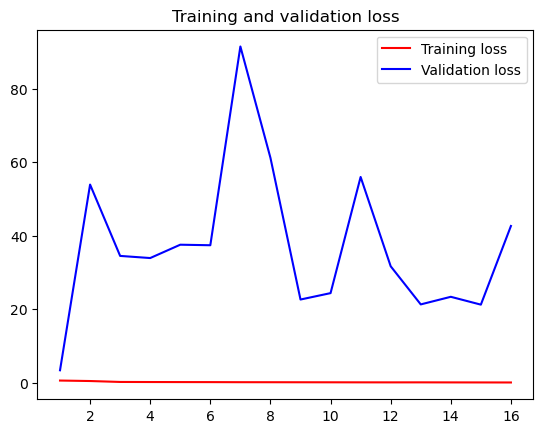

<Figure size 640x480 with 0 Axes>

In [105]:
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
accuracy = hist_dict['accuracy']
val_accuracy = hist_dict['val_accuracy']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

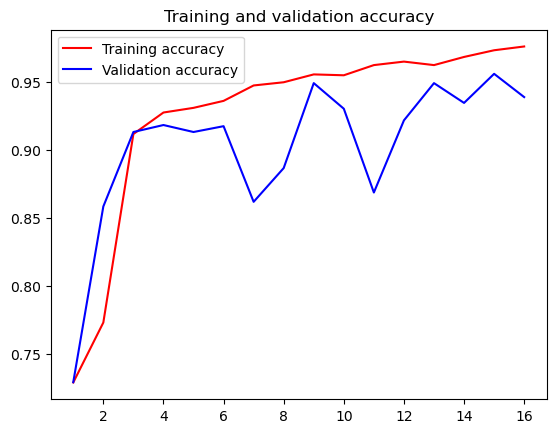

In [106]:
acc_val = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
plt.plot(epochs, acc_val, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()  

In [107]:
# Show the model resuts on testing set
    
loss, accuracy = model.evaluate(test_dataset)

37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.9265 - loss: 53.4381


# Try ConvNeXt  Model


In [126]:
xt = tf.keras.applications.ConvNeXtTiny(

    include_top=False,
    weights=None,   
    input_shape=(img_height, img_width, 3),
    classes=num_classes,
    classifier_activation='softmax' 
)


In [127]:

inputs = tf.keras.Input(shape=(img_height, img_width, 3))  # Define the input shape
x = tf.keras.layers.Rescaling(1./255)(inputs)
x = xt(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)
learning_rate = .01
adam_optimizer_scheduled = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=adam_optimizer_scheduled,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])


In [128]:
epochs_feature_extraction = 10
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)



In [129]:
# Check image sizes
for image_batch, labels_batch in train_dataset:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

for image_batch, labels_batch in val_dataset:
    print(image_batch.shape)
    print(labels_batch.shape)
    break


(16, 112, 112, 3)
(16,)
(16, 112, 112, 3)
(16,)


In [130]:
print(f"\n--- Training for {epochs_feature_extraction} epochs (Feature Extraction Phase) ---")
history_feature_extraction = model.fit(train_dataset,
                                       epochs=epochs_feature_extraction,
                                       validation_data=val_dataset)


--- Training for 10 epochs (Feature Extraction Phase) ---
Epoch 1/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 46s 67ms/step - accuracy: 0.6453 - loss: 1.8493 - val_accuracy: 0.7295 - val_loss: 0.5838
Epoch 2/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.7275 - loss: 0.5892 - val_accuracy: 0.7295 - val_loss: 0.5837
Epoch 3/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.7333 - loss: 0.5820 - val_accuracy: 0.7295 - val_loss: 0.5873
Epoch 4/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.7358 - loss: 0.5793 - val_accuracy: 0.7295 - val_loss: 0.5841
Epoch 5/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.7298 - loss: 0.5860 - val_accuracy: 0.7295 - val_loss: 0.5840
Epoch 6/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.7313 - loss: 0.5839 - val_accuracy: 0.7295 - val_loss: 0.5838
Epoch 7/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.7306 - loss: 0.5856 - val_accuracy: 0.7295 - val_loss: 0.5838
Epoch 8/10
293/293 ━━━━━━━━━━━━

In [131]:
loss, accuracy = model.evaluate(test_dataset)

73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7250 - loss: 0.5888
